<a href="https://colab.research.google.com/github/Cl8D/SSUML/blob/main/Project%201-%20Fashion_Mnist_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

4423680/4422102 [==============================] - 0s 0us/step
train image: (60000, 28, 28)
train label: [9 0 0 ... 3 0 5]
test image: (10000, 28, 28)


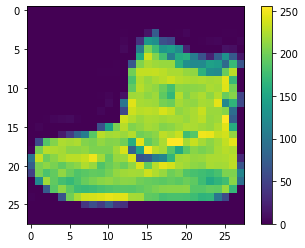

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#라벨 번호 0~9 순서와 일치
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boots']

#데이터 탐색하기
print("train image:", train_images.shape)
print("train label:", train_labels)
print("test image:", test_images.shape)


plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

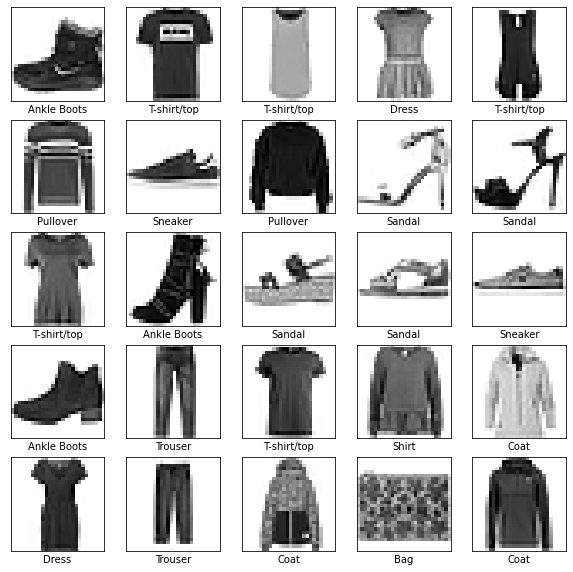

In [ ]:
#process the images

 #이미지 데이터의 픽셀은 0~255의 색으로 표현되기 때문에, 0~1사이의 실수값이 되도록 나눠주기
train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10,10)) #10x10 이미지 출력 
for i in range(25): #출력할 이미지의 배열이 5x5이 되도록
    plt.subplot(5,5,i+1) 
    plt.xticks([]) #x,y축 눈금과 라벨 없도록 만들기
    plt.yticks([])
    plt.grid(False) #grid 없이
    plt.imshow(train_images[i], cmap=plt.cm.binary) #이미지 출력
    plt.xlabel(class_names[train_labels[i]]) #x축의 라벨로 각각의 이미지의 이름 나오도록 하기


In [ ]:
#Build the model
#1. Setup the layers
model = keras.Sequential([keras.layers.Flatten(input_shape = (28, 28)), 
                          #28x28 데이터를 784x1의 1차원 데이터로 만들기
                          keras.layers.Dense(128, activation = tf.nn.relu),
                          #128개의 노드를 가지고, FC(Fully connected) 신경망을 가짐. 활성화함수는 ReLU.
                          #FC 레이어를 추가할 때 Dense()를 쓴다고 한다
                          keras.layers.Dense(10, activation=tf.nn.softmax)])
                          #입력된 이미지가 10종류의 의류 중 어디에 속하는지 softmax 알고리즘 이용함
                          #확률의 합이 1이 되도록, 10가지 각각에 대한 확률값이 나옴
model.summary()

#2. Compile the model
model.compile(optimizer = tf.optimizers.Adam(),  #Adam을 이용해서 최적화
              loss = 'sparse_categorical_crossentropy', #loss function을 설정. 정수 레이블을 사용할 때 사용한다.
              metrics = ['accuracy']) #정확도 평가


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Train the model
model.fit(train_images, train_labels, epochs=5) #epoch를 5로 하여 학습시키기
#정확도가 89% 정도로 나오는 것을 볼 수 있음.

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4981 - accuracy: 0.8267
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3745 - accuracy: 0.8648
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3387 - accuracy: 0.8777
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3160 - accuracy: 0.8836
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2956 - accuracy: 0.8911


In [ ]:
#Evaluate accuracy
#테스트 데이터를 넣어서 모델 평가하기
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuaracy: ', test_acc) 
#정확도는 약 87%

313/313 [==============================] - 0s 1ms/step - loss: 0.3512 - accuracy: 0.8713
Test accuaracy:  0.8712999820709229


In [ ]:
#Make predictions
#10000개의 테스트 이미지를 입력하여 결과를 도출할 것. 10000x10 2차원 배열 구조
predictions = model.predict(test_images)
#첫 번째 이미지 예측하기
print(predictions[0])
#Label[9] - Ankle Boot의 이미지일 확률이 99%로 결과가 나옴 

[5.1475521e-08 4.3959197e-08 1.9169255e-08 2.5727454e-07 9.6781559e-07
 1.3550993e-03 1.3723167e-07 6.5550385e-03 6.9762740e-07 9.9208766e-01]


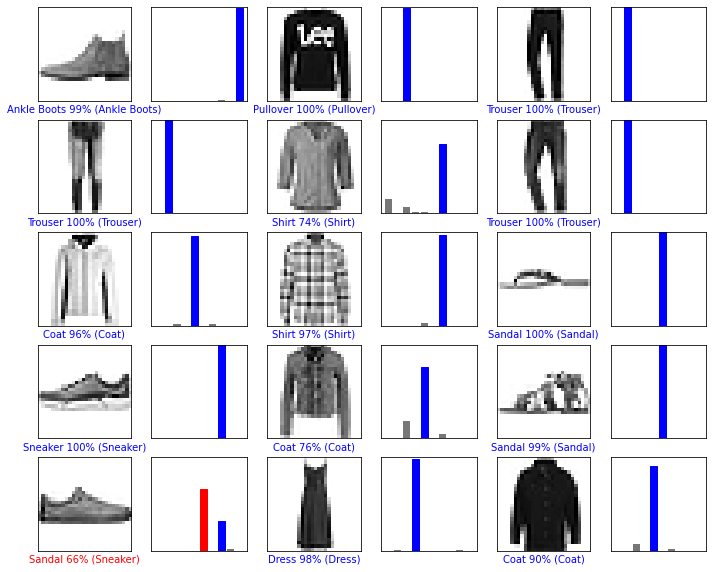

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  #i번째 이미지와 라벨을 출력할 때, 예측값이 실제 라벨과 일치하면 파란색, 불일치하면 빨간색 출력
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


#3x5 형태로 이미지와 그래프 출력
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [ ]:
#테스트 세트에서 이미지 하나 선택하기
img = test_images[0]
print(img.shape)


(28, 28)


In [ ]:
#이미지를 하나만 사용하더라도, tf.keras 모델은 batch 예측이 최적화되어 있기 때문에, 2차원 배열로 만들어 주기
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


[[5.1475325e-08 4.3959197e-08 1.9169255e-08 2.5727454e-07 9.6781559e-07
  1.3550980e-03 1.3723167e-07 6.5550352e-03 6.9762740e-07 9.9208766e-01]]


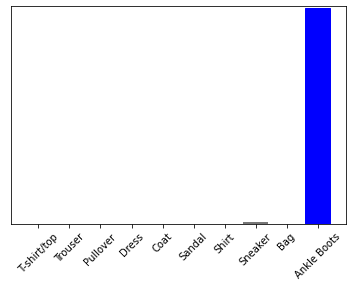

In [ ]:
#이 이미지의 예측 만들기
predictions_single = model.predict(img)
print(predictions_single)

plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation = 45)
